#loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!gdown --id 16fcKbkqAvxq6yHlpIfcvbLe6Y1Aco0sZ

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16fcKbkqAvxq6yHlpIfcvbLe6Y1Aco0sZ
To: /content/imdb-reviews.csv
100% 61.9M/61.9M [00:00<00:00, 219MB/s]


#Download Glove embeddings 

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-12-11 14:16:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-11 14:16:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-11 14:16:33--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Transform Glove Embeddings to word2vecformat

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec


glove_input_file = 'glove.6B.50d.txt'
w2v_output_file = 'glv_with_w2v_format.txt'

glove2word2vec(glove_input_file, w2v_output_file)

(400000, 50)

In [ ]:
from gensim.models import KeyedVectors

model1 = KeyedVectors.load_word2vec_format(w2v_output_file, binary=False)

In [ ]:
#Show a word embedding
print('King: ',model1.get_vector('king'))

result = model1.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

print('Most similar word to King + Woman: ', result)

King:  [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]
Most similar word to King + Woman:  [('queen', 0.8523603677749634)]


#Text Preprocessing


In [ ]:
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
df = pd.read_csv('imdb-reviews.csv',sep='\t')
df['clean_review']=df['review'].str.lower()
STOPWORDS=set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in STOPWORDS])

def stemming(text):
  return " ".join([porter.stem(word) for word in text.split()])

def lemmatization(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['clean_review']=df['clean_review'].apply(lambda x:remove_stopwords(x))
#df['clean_review']=df['clean_review'].apply(lambda x:stemming(x))
#df['clean_review']=df['clean_review'].apply(lambda x:lemmatization(x))
import re
def remove_spl_chars(text):
  text=re.sub('[^a-zA-Z0-9]',' ',text)
  text = re.sub('[0-9]+', ' ', text)
  text=re.sub('\s+',' ',text)
  return text
df['clean_review']=df['clean_review'].apply(lambda x:remove_spl_chars(x))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,url,rating,review,clean_review
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,I thought this was a quiet good movie. It was ...,thought quiet good movie fun watch it liked be...
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,Wagon Master is a very unique film amongst Joh...,wagon master unique film amongst john ford s w...
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,This film has to be as near to perfect a film ...,film near perfect film john ford made film mag...
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,I gave this 4 stars because it has a lot of in...,gave stars lot interesting themes many already...
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,This movie is really genuine and random. It's ...,movie really genuine random really hard find m...


In [ ]:

from collections import Counter
counter=Counter(" ".join(df["clean_review"]).split()).most_common(10)
print(counter)

def exist(word,counter):
  x=[item for item in counter if item[0] == word]
  if not x:
    return False
  else:
    return True
#remove most frequent words
def remove_freq(text,counter):

  return " ".join([word for word in text.split() if exist(word,counter)==False])
df['clean_review']=df['clean_review'].apply(lambda x:remove_freq(x,counter))
df.head()

[('br', 183052), ('s', 86468), ('movie', 81551), ('film', 72758), ('one', 48569), ('like', 36622), ('i', 31049), ('it', 27386), ('good', 26998), ('the', 26335)]


,url,rating,review,clean_review
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,I thought this was a quiet good movie. It was ...,thought quiet fun watch liked best outtakes en...
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,Wagon Master is a very unique film amongst Joh...,wagon master unique amongst john ford work mai...
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,This film has to be as near to perfect a film ...,near perfect john ford made magic masterpiece ...
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,I gave this 4 stars because it has a lot of in...,gave stars lot interesting themes many already...
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,This movie is really genuine and random. It's ...,really genuine random really hard find movies ...


#Creating a new column called sentiment


In [ ]:
def categorise(row):  
    if row['rating'] >= 0.0 and row['rating'] <= 4.0:
        return 0
    else:
        return 1
df['sentiment'] = df.apply(lambda row: categorise(row), axis=1)
df.head()

,url,rating,review,clean_review,sentiment
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,I thought this was a quiet good movie. It was ...,thought quiet fun watch liked best outtakes en...,1
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,Wagon Master is a very unique film amongst Joh...,wagon master unique amongst john ford work mai...,1
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,This film has to be as near to perfect a film ...,near perfect john ford made magic masterpiece ...,1
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,I gave this 4 stars because it has a lot of in...,gave stars lot interesting themes many already...,0
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,This movie is really genuine and random. It's ...,really genuine random really hard find movies ...,1


#Data cleaning

In [ ]:
#removing rows with at least one missing values
df=df.dropna()
df
#drop duplicates
df.duplicated().sum()
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,url,rating,review,clean_review,sentiment
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,I thought this was a quiet good movie. It was ...,thought quiet fun watch liked best outtakes en...,1
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,Wagon Master is a very unique film amongst Joh...,wagon master unique amongst john ford work mai...,1
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,This film has to be as near to perfect a film ...,near perfect john ford made magic masterpiece ...,1
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,I gave this 4 stars because it has a lot of in...,gave stars lot interesting themes many already...,0
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,This movie is really genuine and random. It's ...,really genuine random really hard find movies ...,1
...,...,...,...,...,...
44922,http://www.imdb.com/title/tt0449000/usercomments,1.0,I don't even know where to begin...<br /><br /...,even know begin worth typing review quote anot...,0
44923,http://www.imdb.com/title/tt0109382/usercomments,1.0,One of the worst movies I saw in the 90s. I'd ...,worst movies saw d often use benchmark viewing...,0
44924,http://www.imdb.com/title/tt0375560/usercomments,1.0,Baldwin has really stooped low to make such mo...,baldwin really stooped low make movies script ...,0
44925,http://www.imdb.com/title/tt0165107/usercomments,1.0,If you liked watching Mel Gibson in Million Do...,liked watching mel gibson million dollar hotel...,0


#Glove embeddings to Word2vec

In [ ]:
#https://edumunozsala.github.io/BlogEms/jupyter/nlp/classification/embeddings/python/2020/08/15/Intro_NLP_WordEmbeddings_Classification.html
import numpy as np
class Word2VecVectorizer:
  def __init__(self, model):
    print("Loading in word vectors...")
    self.word_vectors = model
    print("Finished loading in word vectors")

  def fit(self, data):
    pass

  def transform(self, data):
    # determine the dimensionality of vectors
    v = self.word_vectors.get_vector('king')
    self.D = v.shape[0]

    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.split()
      vecs = []
      m = 0
      for word in tokens:
        try:
          # throws KeyError if word not found
          vec = self.word_vectors.get_vector(word)
          vecs.append(vec)
          m += 1
        except KeyError:
          pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Number of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X


  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

In [ ]:
X=df['clean_review']

# Set a word vectorizer
vectorizer = Word2VecVectorizer(model1)
# Get the sentence embeddings 
X = vectorizer.fit_transform(X)
X.shape




Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 44927


(44927, 50)

In [ ]:
X

array([[-0.04403944,  0.31484815, -0.3212482 , ..., -0.29317078,
        -0.21319988,  0.38541666],
       [ 0.10958945,  0.34357741, -0.07611836, ..., -0.32377532,
        -0.09537628,  0.16209762],
       [ 0.12855312,  0.16923413, -0.01336487, ..., -0.31983215,
        -0.07462604,  0.01153394],
       ...,
       [ 0.16913185, -0.02950063,  0.01896244, ...,  0.04819721,
        -0.0293529 ,  0.24490364],
       [ 0.01662361,  0.03556048,  0.05268693, ..., -0.15250804,
        -0.18036756,  0.29071879],
       [ 0.09851937,  0.13900521, -0.17504822, ..., -0.25975519,
        -0.09787131,  0.10278395]])

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
scaler = StandardScaler()
X=scaler.fit_transform(X)

X

array([[-1.99465074,  1.90168581, -2.02694924, ..., -1.27688357,
        -2.09161853,  1.69269741],
       [-0.44806303,  2.16427423,  0.09552751, ..., -1.51110492,
        -0.62743449, -0.12914855],
       [-0.25715504,  0.57075848,  0.6388837 , ..., -1.48092718,
        -0.36957291, -1.35745325],
       ...,
       [ 0.15135245, -1.24569779,  0.91879231, ...,  1.33565911,
         0.19303255,  0.54638639],
       [-1.38395356, -0.65103255,  1.21079859, ..., -0.20036956,
        -1.68361398,  0.92014832],
       [-0.55950593,  0.29446308, -0.76106474, ..., -1.02114886,
        -0.65843999, -0.61303193]])

#Pytorch

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, H4, D_out):
        super(Net, self).__init__()
   
        
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear2act=nn.ReLU()
        self.linear3 = nn.Linear(H2, H3)
        self.linear3act=nn.ReLU()
        self.linear4=nn.Linear(H3,H4)
        self.linear4act=nn.ReLU()
        self.linear5 = nn.Linear(H4, D_out)
        self.linear5act=nn.Sigmoid()
        
    def forward(self, x):
        h1 = self.linear1(x)
       
        h2 = self.linear2(h1)
        h2act=self.linear2act(h2)
        h3 = self.linear3(h2act)
        h3act=self.linear3act(h3)
        h4=self.linear4(h3act)
        h4act=self.linear4act(h4)
        out = self.linear5(h4act)
        out=self.linear5act(out)
  
        return out

In [ ]:
y=df['sentiment']
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    X,y , test_size=0.15, random_state=42)

x_train = torch.tensor(x_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

print(f"x shape: {x_train.shape}")
print(f"y shape: {y_train.shape}")

x shape: torch.Size([38187, 50])
y shape: torch.Size([38187])


In [ ]:



x_val = torch.tensor(x_val, dtype=torch.float)

y_val = torch.tensor(y_val.values, dtype=torch.float)

In [ ]:

print(f"x train shape: {x_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"x validation shape: {x_val.shape}")
print(f"y validation shape: {y_val.shape}")

x train shape: torch.Size([38187, 50])
y train shape: torch.Size([38187])
x validation shape: torch.Size([6740, 50])
y validation shape: torch.Size([6740])


In [ ]:
#Define layer sizes
D_in = x_train.shape[1]
H1 = 256
H2 = 128
H3 = 64
H4 = 32
D_out = 1

#Define Hyperparameters
learning_rate = 0.00003

#Initialise model, loss, optimizer
model = Net(D_in, H1, H2, H3, H4,D_out)
loss_func = nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Initialise dataloader

train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

valid_dataset = torch.utils.data.TensorDataset(x_val, y_val)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=16, shuffle=True)



In [ ]:
model

Net(
  (linear1): Linear(in_features=50, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (linear2act): ReLU()
  (linear3): Linear(in_features=128, out_features=64, bias=True)
  (linear3act): ReLU()
  (linear4): Linear(in_features=64, out_features=32, bias=True)
  (linear4act): ReLU()
  (linear5): Linear(in_features=32, out_features=1, bias=True)
  (linear5act): Sigmoid()
)

In [ ]:
def count_correct(y_batch,y_pred):
   ypreds=[]
   ytrues=[]
   for i, x in enumerate(y_pred):
        ypreds.append(np.round(x.detach().numpy()))
   for i, x in enumerate(y_batch):
        ytrues.append(np.round(x.detach().numpy()))
   return np.sum(ypreds==ytrues)


In [ ]:
train_losses= []
val_losses=[]
epochs=[]
ytrues=[]
ypreds=[]

for epoch in range(100):
  epochs.append(epoch)
  batch_losses = []
  batch_val_losses=[]
  correct_train=0
  for x_batch, y_batch in train_dataloader:
    y_pred = model(x_batch)
   # print(y_pred,y_batch)
    y_batch=y_batch.unsqueeze(1)
    #print(y_pred.shape,y_batch.shape)
    loss = loss_func(y_pred, y_batch)
    batch_losses.append(loss.item())
    #correct_train+=count_correct(y_batch,y_pred)
    
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

  train_loss=sum(batch_losses)/len(train_dataloader)
  train_losses.append(train_loss)
  #accuracy=(correct_train/len(train_dataloader))*100



  for x_batch, y_batch in valid_dataloader:
    y_pred = model(x_batch)
   # print(y_pred,y_batch)
    y_batch=y_batch.unsqueeze(1)
    #print(y_pred.shape,y_batch.shape)
   
    if(epoch==99):
      for i, x in enumerate(y_pred):
        ypreds.append(np.round(x.detach().numpy()))
      for i, x in enumerate(y_batch):
        ytrues.append(np.round(x.detach().numpy()))
    loss = loss_func(y_pred, y_batch)
    batch_val_losses.append(loss.item())
    
  val_loss=sum(batch_val_losses)/len(valid_dataloader)
  val_losses.append(val_loss)
 

  print(f"Epoch {epoch:3}: Train Loss = {train_loss:.5f}, Validation Loss= {val_loss:.5f}")
 

Epoch   0: Train Loss = 4.00283, Validation Loss= 3.99196
Epoch   1: Train Loss = 3.99640, Validation Loss= 3.98574
Epoch   2: Train Loss = 3.99005, Validation Loss= 3.97945
Epoch   3: Train Loss = 3.98350, Validation Loss= 3.97289
Epoch   4: Train Loss = 3.97655, Validation Loss= 3.96588
Epoch   5: Train Loss = 3.96902, Validation Loss= 3.95818
Epoch   6: Train Loss = 3.96066, Validation Loss= 3.94954
Epoch   7: Train Loss = 3.95121, Validation Loss= 3.93967
Epoch   8: Train Loss = 3.94038, Validation Loss= 3.92830
Epoch   9: Train Loss = 3.92785, Validation Loss= 3.91510
Epoch  10: Train Loss = 3.91318, Validation Loss= 3.89955
Epoch  11: Train Loss = 3.89586, Validation Loss= 3.88112
Epoch  12: Train Loss = 3.87524, Validation Loss= 3.85914
Epoch  13: Train Loss = 3.85052, Validation Loss= 3.83273
Epoch  14: Train Loss = 3.82067, Validation Loss= 3.80072
Epoch  15: Train Loss = 3.78442, Validation Loss= 3.76188
Epoch  16: Train Loss = 3.74056, Validation Loss= 3.71507
Epoch  17: Tra

In [ ]:
print(len(ypreds))
print(len(ytrues))

6740
6740


In [ ]:
print(ypreds)
print(ytrues)




[array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=f

0.7719087635054022
0.7658180735447372
0.7598227474150665


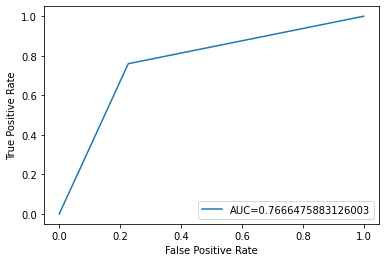

In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
print(precision_score(ytrues,ypreds))
print(f1_score(ytrues,ypreds))
print(recall_score(ytrues,ypreds))
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(ytrues,  ypreds)
auc = metrics.roc_auc_score(ytrues, ypreds)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Plot learning curves

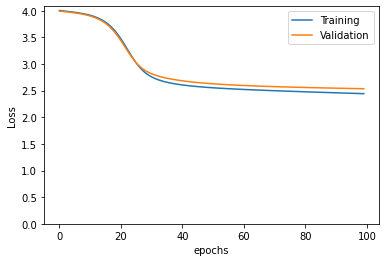

In [ ]:
#import matplotlib.pyplot as plt
plt.plot(epochs,train_losses)
plt.plot(epochs,val_losses)

plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(ymin=0)
plt.legend(["Training", "Validation"])
plt.show()

In [ ]:
print(train_losses)
print(val_losses)

[4.002826175681706, 3.9963973487427307, 3.990046457211543, 3.9835027491741717, 3.9765527837686974, 3.969017226774921, 3.9606609406409325, 3.9512129475194437, 3.9403774452648954, 3.9278487187326827, 3.9131839160495687, 3.8958559067218337, 3.8752355354822074, 3.8505228795314066, 3.8206693642699774, 3.784421725307092, 3.7405574690311787, 3.687861280257501, 3.625504810839055, 3.5530441627374594, 3.4709366475581924, 3.380824374013932, 3.2859343373730536, 3.19071669083137, 3.099770827277415, 3.0167094653352913, 2.943986999623986, 2.88242211849259, 2.8315026649232182, 2.789974149121467, 2.7562187566235816, 2.7285552851116, 2.7056783733379905, 2.6863966710306784, 2.669959819836251, 2.655827008734001, 2.6434614077041876, 2.6325440185810165, 2.6228183685709454, 2.61404311279897, 2.6060699476674354, 2.5987945873966067, 2.592058387482371, 2.585900579816785, 2.580182503495298, 2.5747995532902404, 2.56984680653817, 2.565145721383608, 2.5607787455831255, 2.5566566742809935, 2.5526897569655573, 2.5489